In [ ]:
# загрузка библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import pandas as pd
import random
from google.colab import files
import matplotlib.pyplot as plt
import plotly as px
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

#Задание Ultra Lite

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.
Можно смотреть в ноутбук с занятия, но код писать самостоятельно.

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()
print(x_train_org.shape)
print(x_test_org.shape)
# нормирование
x_train = x_train_org.astype('float32')
x_test = x_test_org.astype('float32')

x_train = x_train / 255
x_test  = x_test / 255

y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


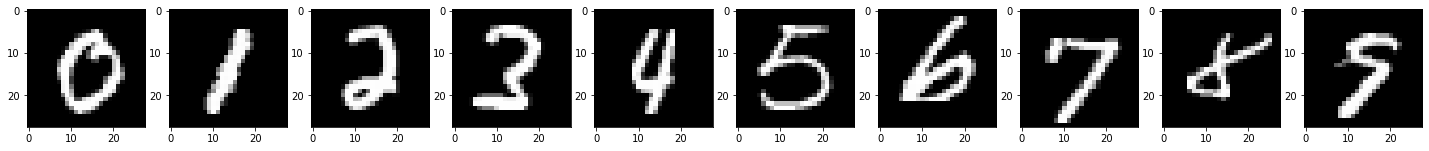

In [ ]:
# выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) 
for i in range(10): 
  label_indexes = np.where(y_train_org==i)[0] 
  index = random.choice(label_indexes) 
  img = x_train_org[index] 
  axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show() 

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
# сделаем нейронную сеть

model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        7

Epoch 1/15
469/469 [==============================] - 23s 12ms/step - loss: 0.4909 - accuracy: 0.8598 - val_loss: 0.1011 - val_accuracy: 0.9811
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0501 - accuracy: 0.9862 - val_loss: 0.0529 - val_accuracy: 0.9830
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0412 - val_accuracy: 0.9865
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0221 - accuracy: 0.9940 - val_loss: 0.0392 - val_accuracy: 0.9878
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0258 - val_accuracy: 0.9911
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0566 - val_accuracy: 0.9813
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.0258 - val_accuracy: 0.991

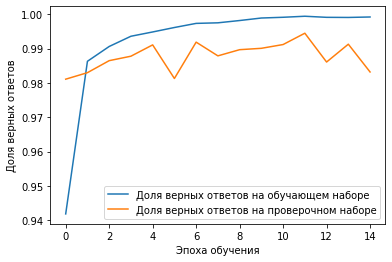

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)


plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Точность на тестовой выборке 98%

In [ ]:
# определение цифр из тестовой выборки

n = np.random.randint(x_test.shape[0])

prediction = model.predict(x_test)

print("Выход сети: ", prediction[n])
print("Распознанная цифра: ", np.argmax(prediction[n]))
print("Верный ответ: ", np.argmax(y_test[n]))

Выход сети:  [3.9057928e-12 1.2951382e-15 8.6105515e-15 1.1046509e-11 2.1398018e-12
 1.0000000e+00 1.5014903e-11 9.3096534e-16 1.3181807e-08 2.1865625e-09]
Распознанная цифра:  5
Верный ответ:  5


Верно распознает цифру

# Задание Lite

Провести серию экспериментов по подбору гиперпараметров нейронной сети, созданной на занятии (можно использовать любую нейросеть с занятия, либо создать свою свёрточную сеть).

1. Поменять количество нейронов (фильтров) в скрытом сверточном слое и обучить сеть, использовав следующие значения:

* первая сеть - скрытый слой 2 нейрона

* вторая сеть - тот же скрытый слой 4 нейрона

* третья сеть - тот же скрытый слой 16 нейронов

2. Поменять активационную функцию в скрытых слоях с relu на linear

3. Поменять размеры batch_size:

* 10

* 100

* Вся база (50000)



## 1. Поменять количество нейронов (фильтров) в скрытом сверточном слое и обучить сеть, использовав следующие значения

In [ ]:
# сверточная сеть

model2 = Sequential()
model2.add(BatchNormalization(input_shape=(28, 28, 1)))
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Размер фильтра (2,2)

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3607 - accuracy: 0.8900 - val_loss: 0.0493 - val_accuracy: 0.9837
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0566 - accuracy: 0.9821 - val_loss: 0.0408 - val_accuracy: 0.9874
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0361 - accuracy: 0.9880 - val_loss: 0.0372 - val_accuracy: 0.9882
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0258 - accuracy: 0.9908 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 0.0347 - val_accuracy: 0.9894
Epoch 

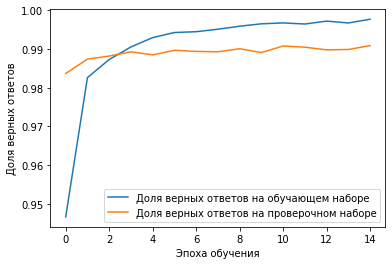

In [ ]:
history = model2.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Точность на тестовой выборке 99%

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3442 - accuracy: 0.8921 - val_loss: 0.0430 - val_accuracy: 0.9857
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0506 - accuracy: 0.9845 - val_loss: 0.0340 - val_accuracy: 0.9885
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0269 - val_accuracy: 0.9911
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0237 - val_accuracy: 0.9925
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0313 - val_accuracy: 0.9909
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0281 - val_accuracy: 0.9917
Epoch 

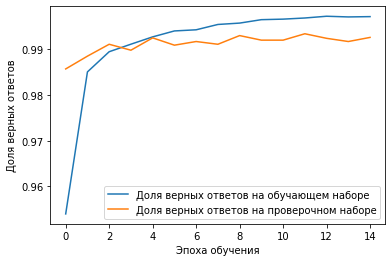

In [ ]:
# сверточная сеть

model4 = Sequential()
model4.add(BatchNormalization(input_shape=(28, 28, 1)))
model4.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model4.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model4.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Размер фильтра (4,4) точность 99.26%

Epoch 1/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3579 - accuracy: 0.8862 - val_loss: 0.0470 - val_accuracy: 0.9847
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0620 - accuracy: 0.9810 - val_loss: 0.0463 - val_accuracy: 0.9852
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0412 - accuracy: 0.9873 - val_loss: 0.0324 - val_accuracy: 0.9896
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0212 - accuracy: 0.9928 - val_loss: 0.0319 - val_accuracy: 0.9909
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0192 - accuracy: 0.9941 - val_loss: 0.0364 - val_accuracy: 0.9898
Epoch 

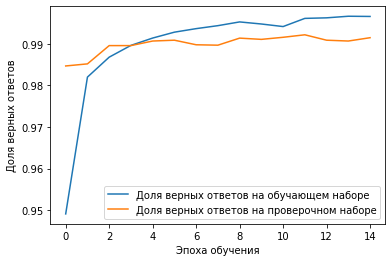

In [ ]:
# сверточная сеть

model16 = Sequential()
model16.add(BatchNormalization(input_shape=(28, 28, 1)))
model16.add(Conv2D(32, (16, 16), padding='same', activation='relu'))
model16.add(Conv2D(32, (16, 16), padding='same', activation='relu'))
model16.add(MaxPooling2D(pool_size=(2, 2)))
model16.add(Dropout(0.25))

model16.add(Flatten())
model16.add(Dense(256, activation='relu'))
model16.add(Dropout(0.25))
model16.add(Dense(10, activation='softmax'))

model16.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model16.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Точность на тестовой выборке 99.15% - размер фильтра (16,16)

## 2. Поменять активационную функцию в скрытых слоях с relu на linear

Epoch 1/15
469/469 [==============================] - 3s 5ms/step - loss: 0.3999 - accuracy: 0.8796 - val_loss: 0.0992 - val_accuracy: 0.9698
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0993 - accuracy: 0.9689 - val_loss: 0.0774 - val_accuracy: 0.9761
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0817 - accuracy: 0.9746 - val_loss: 0.0716 - val_accuracy: 0.9770
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0724 - accuracy: 0.9764 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0689 - accuracy: 0.9780 - val_loss: 0.0661 - val_accuracy: 0.9797
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0598 - accuracy: 0.9805 - val_loss: 0.0656 - val_accuracy: 0.9804
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0573 - accuracy: 0.9812 - val_loss: 0.0783 - val_accuracy: 0.9768
Epoch 

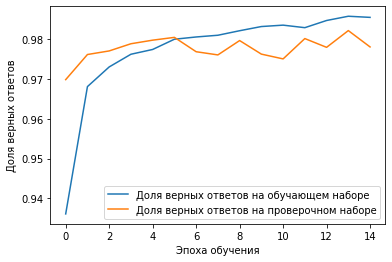

In [ ]:
# сверточная сеть

modell = Sequential()
modell.add(BatchNormalization(input_shape=(28, 28, 1)))
modell.add(Conv2D(32, (4, 4), padding='same', activation='linear'))
modell.add(Conv2D(32, (4, 4), padding='same', activation='linear'))
modell.add(MaxPooling2D(pool_size=(2, 2)))
modell.add(Dropout(0.25))

modell.add(Flatten())
modell.add(Dense(256, activation='linear'))
modell.add(Dropout(0.25))
modell.add(Dense(10, activation='softmax'))

modell.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = modell.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Поменяли функцию активации в скрытых слоях с релу на линеар - точность ухудшилась, линейная функция не подходит 97.80%, так как в целом задача распознавания цифр - задача нелинейная

## 3. Поменять размеры batch_size

Epoch 1/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.2067 - accuracy: 0.9357 - val_loss: 0.0481 - val_accuracy: 0.9854
Epoch 2/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0535 - accuracy: 0.9838 - val_loss: 0.0411 - val_accuracy: 0.9872
Epoch 3/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0355 - accuracy: 0.9889 - val_loss: 0.0290 - val_accuracy: 0.9908
Epoch 4/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.0289 - val_accuracy: 0.9921
Epoch 5/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0220 - accuracy: 0.9928 - val_loss: 0.0244 - val_accuracy: 0.9930
Epoch 6/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0393 - val_accuracy: 0.9913
Epoch 7/15
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0180 - accuracy: 0.9948 - val_loss: 0.0256 - val_ac

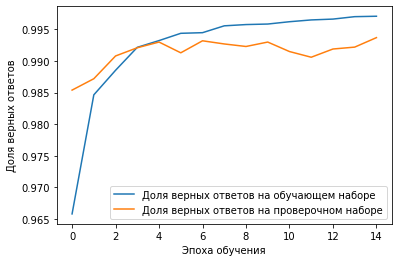

In [ ]:
# сверточная сеть

model10 = Sequential()
model10.add(BatchNormalization(input_shape=(28, 28, 1)))
model10.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model10.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Dropout(0.25))

model10.add(Flatten())
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(0.25))
model10.add(Dense(10, activation='softmax'))

model10.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model10.fit(x_train, 
                    y_train, 
                    batch_size=10, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Размер батчей - 10 - точность на тестовой выборке 99.37%

Epoch 1/15
600/600 [==============================] - 3s 4ms/step - loss: 0.2913 - accuracy: 0.9070 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 2/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0483 - accuracy: 0.9849 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 3/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 4/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0258 - val_accuracy: 0.9917
Epoch 5/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0338 - val_accuracy: 0.9906
Epoch 6/15
600/600 [==============================] - 2s 4ms/step - loss: 0.0177 - accuracy: 0.9941 - val_loss: 0.0298 - val_accuracy: 0.9909
Epoch 7/15
600/600 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0280 - val_accuracy: 0.9925
Epoch 

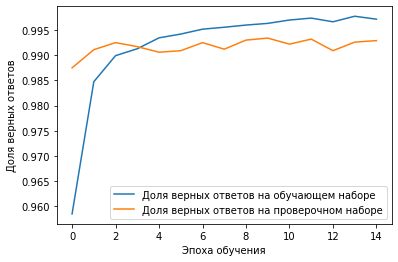

In [ ]:
# сверточная сеть

model100 = Sequential()
model100.add(BatchNormalization(input_shape=(28, 28, 1)))
model100.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model100.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model100.add(MaxPooling2D(pool_size=(2, 2)))
model100.add(Dropout(0.25))

model100.add(Flatten())
model100.add(Dense(256, activation='relu'))
model100.add(Dropout(0.25))
model100.add(Dense(10, activation='softmax'))

model100.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model100.fit(x_train, 
                    y_train, 
                    batch_size=100, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Размер батчей - 100 - точность на тестовой выборке 99.29%
Увеличиваем количество батчей - быстрее обучение

Epoch 1/5
60000/60000 [==============================] - 177s 3ms/step - loss: 0.2299 - accuracy: 0.9315 - val_loss: 0.0642 - val_accuracy: 0.9818
Epoch 2/5
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0861 - accuracy: 0.9773 - val_loss: 0.0567 - val_accuracy: 0.9851
Epoch 3/5
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0851 - accuracy: 0.9782 - val_loss: 0.0667 - val_accuracy: 0.9856
Epoch 4/5
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0841 - accuracy: 0.9784 - val_loss: 0.0897 - val_accuracy: 0.9854
Epoch 5/5
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0906 - accuracy: 0.9780 - val_loss: 0.0594 - val_accuracy: 0.9865


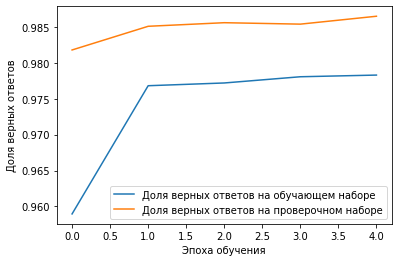

In [ ]:
# сверточная сеть

model5 = Sequential()
model5.add(BatchNormalization(input_shape=(28, 28, 1)))
model5.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model5.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(10, activation='softmax'))

model5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model5.fit(x_train, 
                    y_train, 
                    epochs=5,
                    validation_data=(x_test, y_test),
                    batch_size=1,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Задание Pro

Провести ряд экспериментов с архитектурой нейронной сети:

* Исследовать влияние количества слоев conv2d.
* Исследовать влияние количества нейронов (фильтров) в слоях conv2d.
* Исследовать влияние MaxPooling2D в сети.
* Исследовать влияние Dropout.
* Написать выводы по результатам проведенных тестов. 

## Исследовать влияние количества слоев conv2d

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3687 - accuracy: 0.8805 - val_loss: 0.0953 - val_accuracy: 0.9716
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.0625 - val_accuracy: 0.9816
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0649 - val_accuracy: 0.9803
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0197 - accuracy: 0.9941 - val_loss: 0.0620 - val_accuracy: 0.9828
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0645 - val_accuracy: 0.9833
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0768 - val_accuracy: 0.9829
Epoch 

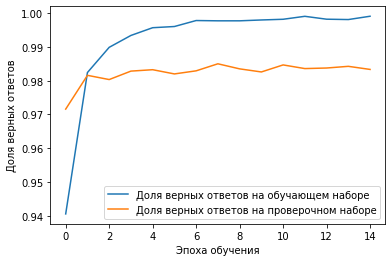

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Только один сверточный слой - точность на проверочной выборке 98.33%

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3345 - accuracy: 0.8935 - val_loss: 0.0745 - val_accuracy: 0.9770
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0480 - val_accuracy: 0.9861
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0456 - val_accuracy: 0.9879
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0476 - val_accuracy: 0.9877
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0531 - val_accuracy: 0.9891
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0575 - val_accuracy: 0.9872
Epoch 

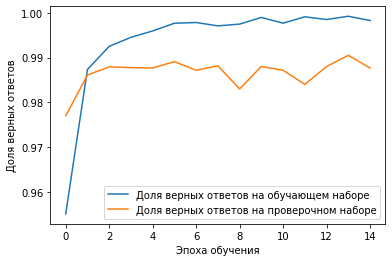

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Два сверточных слоя - точность на проверочной выборке 98.77%

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.3679 - accuracy: 0.8886 - val_loss: 0.0559 - val_accuracy: 0.9836
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0206 - accuracy: 0.9929 - val_loss: 0.0355 - val_accuracy: 0.9903
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0445 - val_accuracy: 0.9892
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0545 - val_accuracy: 0.9866
Epoch 

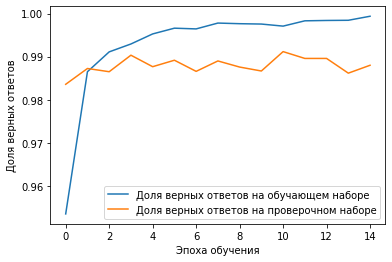

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
Четыре сверточных слоя - точность на проверочной выборке 98.80%

Epoch 1/15
375/375 [==============================] - 9s 21ms/step - loss: 0.9827 - accuracy: 0.6444 - val_loss: 0.0970 - val_accuracy: 0.9766
Epoch 2/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0815 - accuracy: 0.9741 - val_loss: 0.0721 - val_accuracy: 0.9787
Epoch 3/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0548 - accuracy: 0.9844 - val_loss: 0.0435 - val_accuracy: 0.9887
Epoch 4/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0419 - accuracy: 0.9871 - val_loss: 0.0579 - val_accuracy: 0.9833
Epoch 5/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0513 - val_accuracy: 0.9854
Epoch 6/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0465 - val_accuracy: 0.9863
Epoch 7/15
375/375 [==============================] - 8s 21ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0397 - val_accuracy: 0.9876

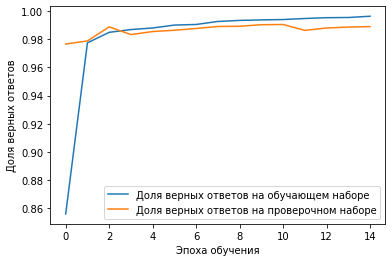

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

16 сверточных слоя - точность на проверочной выборке 98.89%

В целом - количество сверточных слоев улучшает точность на проверочной выборке, но не намного, поэтому не имеет смысла использовать для данной задачи большое количество слоев

## Исследовать влияние количества нейронов (фильтров) в слоях conv2d

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.4127 - accuracy: 0.8727 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9814 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0178 - accuracy: 0.9941 - val_loss: 0.0547 - val_accuracy: 0.9855
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0635 - val_accuracy: 0.9847
Epoch 

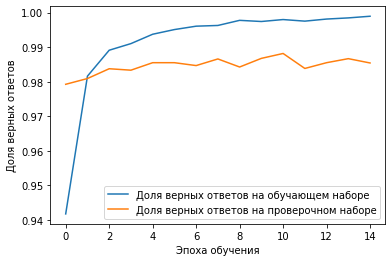

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(8, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(8, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(8, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Количество нейронов в сверточных слоях равно 8 - точность на проверочной выборке 98.54%

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.3169 - accuracy: 0.9013 - val_loss: 0.0576 - val_accuracy: 0.9824
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0421 - accuracy: 0.9865 - val_loss: 0.0452 - val_accuracy: 0.9865
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0480 - val_accuracy: 0.9865
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0485 - val_accuracy: 0.9858
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0439 - val_accuracy: 0.9889
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0606 - val_accuracy: 0.9872
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0091 - accuracy: 0.9968 - val_loss: 0.0503 - val_accuracy: 0.9878
Epoch 

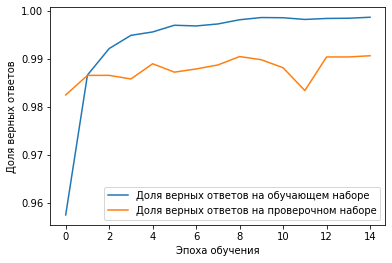

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Количество нейронов в сверточных слоях равно 32 - точность на проверочной выборке 99.06%

Epoch 1/15
375/375 [==============================] - 4s 9ms/step - loss: 0.3233 - accuracy: 0.8944 - val_loss: 0.0692 - val_accuracy: 0.9786
Epoch 2/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0495 - val_accuracy: 0.9855
Epoch 3/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0488 - val_accuracy: 0.9858
Epoch 4/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0474 - val_accuracy: 0.9883
Epoch 5/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 6/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0530 - val_accuracy: 0.9884
Epoch 7/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0420 - val_accuracy: 0.9899
Epoch 

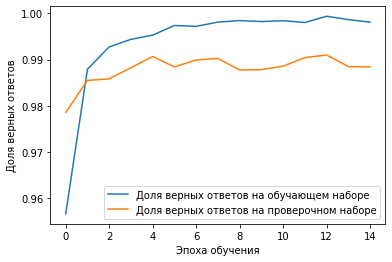

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(64, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Количество нейронов в сверточных слоях равно 64 - точность на проверочной выборке 98.84%

Epoch 1/15
375/375 [==============================] - 41s 103ms/step - loss: 0.8096 - accuracy: 0.8570 - val_loss: 0.0624 - val_accuracy: 0.9808
Epoch 2/15
375/375 [==============================] - 37s 99ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0480 - val_accuracy: 0.9866
Epoch 3/15
375/375 [==============================] - 37s 99ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0605 - val_accuracy: 0.9843
Epoch 4/15
375/375 [==============================] - 37s 99ms/step - loss: 0.0154 - accuracy: 0.9946 - val_loss: 0.0586 - val_accuracy: 0.9862
Epoch 5/15
375/375 [==============================] - 38s 100ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0522 - val_accuracy: 0.9884
Epoch 6/15
375/375 [==============================] - 37s 100ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0675 - val_accuracy: 0.9854
Epoch 7/15
375/375 [==============================] - 37s 100ms/step - loss: 0.0106 - accuracy: 0.9964 - val_loss: 0.0515 - val_accur

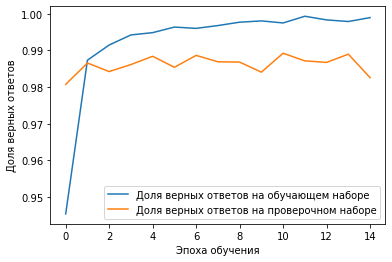

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(500, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(500, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(500, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Количество нейронов в сверточных слоях равно 500 - точность на проверочной выборке 98.26%

Выбрали очень большое количество нейронов в сверточных слоях - анализируя график доли верных ответов на проверочном наборе - видим переобучение - много нейронов выделяют лишнюю информацию

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5475 - accuracy: 0.8322 - val_loss: 0.1544 - val_accuracy: 0.9555
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.1335 - accuracy: 0.9590 - val_loss: 0.1215 - val_accuracy: 0.9635
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0860 - accuracy: 0.9731 - val_loss: 0.1086 - val_accuracy: 0.9683
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9773 - val_loss: 0.0883 - val_accuracy: 0.9764
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9858 - val_loss: 0.0831 - val_accuracy: 0.9769
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0901 - val_accuracy: 0.9762
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0834 - val_accuracy: 0.9789
Epoch 

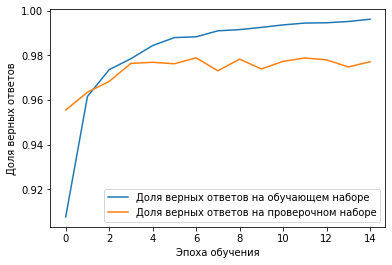

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(2, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(2, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(2, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Количество нейронов в сверточных слоях равно 2 - точность на проверочной выборке 97.72%

Даже в слои с двумя нейрономи в сверточных слоях - решает задачу хорошо

## Исследовать влияние MaxPooling2D в сети

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.3665 - accuracy: 0.8863 - val_loss: 0.0540 - val_accuracy: 0.9831
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0467 - val_accuracy: 0.9865
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0311 - accuracy: 0.9899 - val_loss: 0.0483 - val_accuracy: 0.9871
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0202 - accuracy: 0.9936 - val_loss: 0.0469 - val_accuracy: 0.9884
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0497 - val_accuracy: 0.9869
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9886
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0600 - val_accuracy: 0.9864
Epoch 

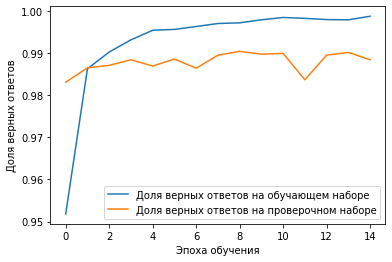

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Сеть без слоев подвыборки - точность на проверочном наборе 98.84%

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.4606 - accuracy: 0.8517 - val_loss: 0.0660 - val_accuracy: 0.9818
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9840 - val_loss: 0.0501 - val_accuracy: 0.9858
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0429 - val_accuracy: 0.9879
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.0401 - val_accuracy: 0.9880
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0637 - val_accuracy: 0.9837
Epoch 6/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0173 - accuracy: 0.9948 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 7/15
375/375 [==============================] - 2s 5ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0358 - val_accuracy: 0.9900
Epoch 

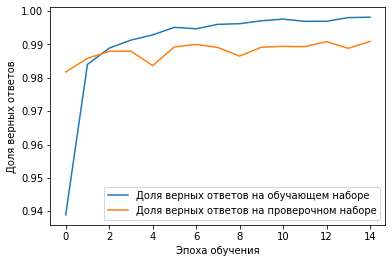

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Один слой подвыборки - точность на проверочном наборе 99.09%

Epoch 1/15
375/375 [==============================] - 2s 5ms/step - loss: 0.5843 - accuracy: 0.8332 - val_loss: 0.0923 - val_accuracy: 0.9709
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0635 - accuracy: 0.9801 - val_loss: 0.0559 - val_accuracy: 0.9832
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0401 - val_accuracy: 0.9884
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.0343 - val_accuracy: 0.9897
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.0456 - val_accuracy: 0.9863
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.0153 - accuracy: 0.9952 - val_loss: 0.0370 - val_accuracy: 0.9894
Epoch 

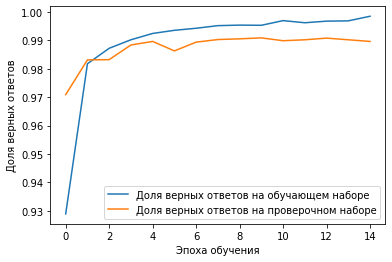

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Три слоя подвыборки - точность на проверочном наборе 98.97%

В целом слои подвыборки позволяют находить другие признаки - для данной задачи на точность не сильно повлияло

## Исследовать влияние Dropout

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3549 - accuracy: 0.8898 - val_loss: 0.0610 - val_accuracy: 0.9824
Epoch 2/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0469 - accuracy: 0.9856 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 3/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0237 - accuracy: 0.9921 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 4/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0423 - val_accuracy: 0.9882
Epoch 5/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0538 - val_accuracy: 0.9876
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0071 - accuracy: 0.9973 - val_loss: 0.0515 - val_accuracy: 0.9880
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0515 - val_accuracy: 0.9862
Epoch 

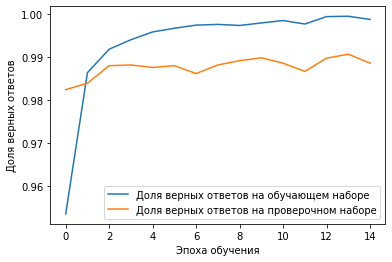

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Нет слоев Дропаут - 98.86% точность на проверочной выборке

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3436 - accuracy: 0.8928 - val_loss: 0.0554 - val_accuracy: 0.9847
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0448 - accuracy: 0.9859 - val_loss: 0.0450 - val_accuracy: 0.9858
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0192 - accuracy: 0.9940 - val_loss: 0.0518 - val_accuracy: 0.9859
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0437 - val_accuracy: 0.9898
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0469 - val_accuracy: 0.9882
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0105 - accuracy: 0.9964 - val_loss: 0.0563 - val_accuracy: 0.9878
Epoch 

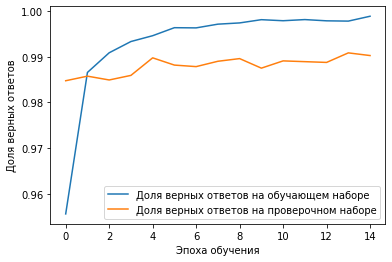

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Три слоя дропаут после каждого сверточного слоя - отключаем 10% нейронов - точность на проверочной выборке - 99.02%

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.3608 - accuracy: 0.8845 - val_loss: 0.0549 - val_accuracy: 0.9835
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0314 - accuracy: 0.9904 - val_loss: 0.0379 - val_accuracy: 0.9889
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0439 - val_accuracy: 0.9871
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0404 - val_accuracy: 0.9891
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0455 - val_accuracy: 0.9890
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0447 - val_accuracy: 0.9885
Epoch 

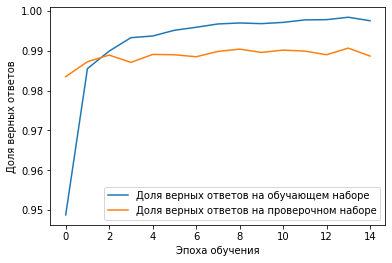

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Три слоя дропаут после каждого сверточного слоя - отключаем 10% нейронов - также добавили слой дропаут после полносвязного - точность уменьшилась 98.87%

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.5348 - accuracy: 0.8302 - val_loss: 0.0698 - val_accuracy: 0.9791
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.0478 - val_accuracy: 0.9874
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0367 - accuracy: 0.9877 - val_loss: 0.0377 - val_accuracy: 0.9904
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0391 - val_accuracy: 0.9898
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.0412 - val_accuracy: 0.9885
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0202 - accuracy: 0.9932 - val_loss: 0.0642 - val_accuracy: 0.9857
Epoch 

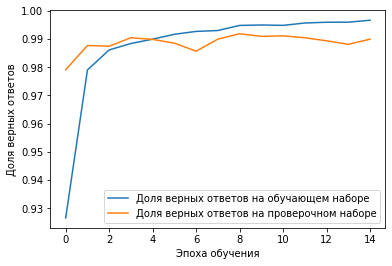

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Три слоя дропаут после каждого сверточного слоя - отключаем 20% нейронов - также добавили слой дропаут после полносвязного - точность на проверочной выборке 98.99%

Также когда отключаем нейроны - при обучении - точность возрастает медленнее при обучении

Epoch 1/15
375/375 [==============================] - 3s 7ms/step - loss: 0.7244 - accuracy: 0.7634 - val_loss: 0.0844 - val_accuracy: 0.9759
Epoch 2/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1715 - accuracy: 0.9487 - val_loss: 0.0581 - val_accuracy: 0.9837
Epoch 3/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1275 - accuracy: 0.9634 - val_loss: 0.0477 - val_accuracy: 0.9867
Epoch 4/15
375/375 [==============================] - 3s 7ms/step - loss: 0.1020 - accuracy: 0.9702 - val_loss: 0.0441 - val_accuracy: 0.9864
Epoch 5/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0916 - accuracy: 0.9725 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 6/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0809 - accuracy: 0.9783 - val_loss: 0.0386 - val_accuracy: 0.9894
Epoch 7/15
375/375 [==============================] - 3s 7ms/step - loss: 0.0739 - accuracy: 0.9784 - val_loss: 0.0414 - val_accuracy: 0.9896
Epoch 

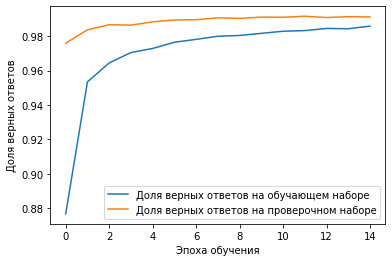

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    validation_split = 0.2,
                    batch_size = 128,
                    verbose=1)

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Отключили 50% нейронов - точность на обучающем наборе меньше, чем на проверочном. Сеть медленне обучается и меньше признаков достает на обучающей выборке из-за чего переобучение снижается - как итог выше точность на проверочной

#Задание Ultra pro

Добейтесь точности не менее 85% на проверочной выборке на базе трех иномарок. 

Размер проверочной выборки - 20%.

In [ ]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -q "/content/drive/MyDrive/Занятие №3/Автомобили.zip" -d /content

In [ ]:
path = '/content/Автомобили'
train_path = path + '/train'
val_path = path + '/val'
batch_size = 25
img_width = 96
img_height = 54

In [ ]:
# генератор изображений
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True
)

val_generator = datagent.flow_from_directory(
    val_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


In [ ]:
train_generator.class_indices

{'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}

In [ ]:
val_generator.class_indices

{'Ferrari': 0, 'Mercedes': 1, 'Renault': 2}

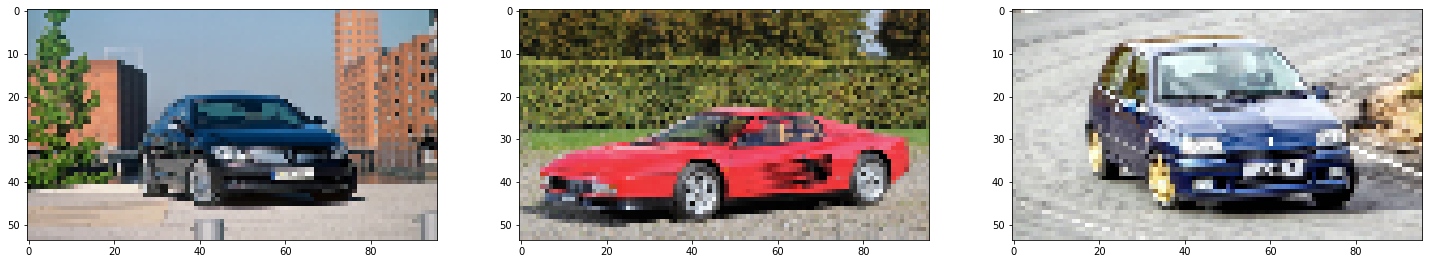

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5)) 
for i in range(3): 
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'
  img_path = car_path + random.choice(os.listdir(car_path))
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width)))

plt.show() 
# мерс, феррари, рено

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 10s 87ms/step - loss: 1.0578 - accuracy: 0.3874 - val_loss: 0.9678 - val_accuracy: 0.4578
Epoch 2/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8910 - accuracy: 0.5672 - val_loss: 1.0113 - val_accuracy: 0.5126
Epoch 3/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8657 - accuracy: 0.5895 - val_loss: 0.9159 - val_accuracy: 0.5526
Epoch 4/45
109/109 [==============================] - 9s 86ms/step - loss: 0.8247 - accuracy: 0.6316 - val_loss: 0.9161 - val_accuracy: 0.5689
Epoch 5/45
109/109 [==============================] - 9s 85ms/step - loss: 0.7902 - accuracy: 0.6454 - val_loss: 0.9824 - val_accuracy: 0.5807
Epoch 6/45
109/109 [==============================] - 9s 86ms/step - loss: 0.8171 - accuracy: 0.6265 - val_loss: 0.9016 - val_accuracy: 0.5911
Epoch 7/45
109/109 [==============================] - 9s 87ms/step - loss: 0.7468 - accuracy: 0.6586 - val_loss: 0.8526 - val_accuracy: 0.632

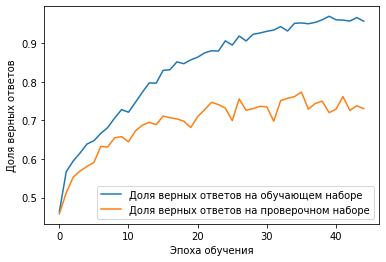

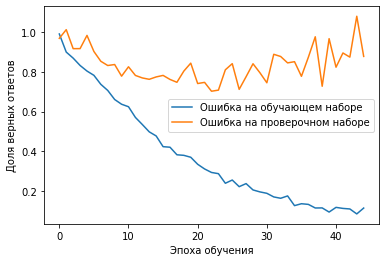

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Переобучение? ошибка увеличивается на проверочной выборке

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(512, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(1024, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(1024, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 12s 93ms/step - loss: 1.1630 - accuracy: 0.4889 - val_loss: 1.2712 - val_accuracy: 0.3393
Epoch 2/45
109/109 [==============================] - 9s 84ms/step - loss: 0.9516 - accuracy: 0.5603 - val_loss: 1.3659 - val_accuracy: 0.3348
Epoch 3/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8931 - accuracy: 0.5798 - val_loss: 1.4176 - val_accuracy: 0.3363
Epoch 4/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8878 - accuracy: 0.5856 - val_loss: 1.6509 - val_accuracy: 0.3407
Epoch 5/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8643 - accuracy: 0.6029 - val_loss: 1.1393 - val_accuracy: 0.3852
Epoch 6/45
109/109 [==============================] - 9s 85ms/step - loss: 0.8150 - accuracy: 0.6334 - val_loss: 1.0805 - val_accuracy: 0.4874
Epoch 7/45
109/109 [==============================] - 9s 85ms/step - loss: 0.7872 - accuracy: 0.6535 - val_loss: 0.9819 - val_accuracy: 0.564

In [ ]:
model = Sequential()
model.add(Conv2D(512, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(1024, (2, 2), padding='same', activation='relu'))
model.add(Conv2D(1024, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 20s 153ms/step - loss: 2.1260 - accuracy: 0.4616 - val_loss: 1.3572 - val_accuracy: 0.3393
Epoch 2/45
109/109 [==============================] - 15s 133ms/step - loss: 1.2639 - accuracy: 0.5410 - val_loss: 1.7751 - val_accuracy: 0.3378
Epoch 3/45
109/109 [==============================] - 14s 132ms/step - loss: 1.0061 - accuracy: 0.5447 - val_loss: 1.6944 - val_accuracy: 0.3452
Epoch 4/45
109/109 [==============================] - 14s 133ms/step - loss: 0.9130 - accuracy: 0.5636 - val_loss: 1.8567 - val_accuracy: 0.3541
Epoch 5/45
109/109 [==============================] - 14s 132ms/step - loss: 0.9021 - accuracy: 0.5751 - val_loss: 1.0455 - val_accuracy: 0.4919
Epoch 6/45
109/109 [==============================] - 15s 133ms/step - loss: 0.8477 - accuracy: 0.6014 - val_loss: 0.9266 - val_accuracy: 0.5615
Epoch 7/45
109/109 [==============================] - 15s 134ms/step - loss: 0.8253 - accuracy: 0.6180 - val_loss: 1.0284 - val_ac

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 11s 89ms/step - loss: 1.0401 - accuracy: 0.4326 - val_loss: 0.9630 - val_accuracy: 0.5052
Epoch 2/45
109/109 [==============================] - 9s 84ms/step - loss: 0.9087 - accuracy: 0.5331 - val_loss: 0.9510 - val_accuracy: 0.5170
Epoch 3/45
109/109 [==============================] - 9s 83ms/step - loss: 0.8933 - accuracy: 0.5553 - val_loss: 0.9544 - val_accuracy: 0.5407
Epoch 4/45
109/109 [==============================] - 9s 83ms/step - loss: 0.8759 - accuracy: 0.5511 - val_loss: 0.9300 - val_accuracy: 0.5511
Epoch 5/45
109/109 [==============================] - 9s 83ms/step - loss: 0.8076 - accuracy: 0.6348 - val_loss: 0.9249 - val_accuracy: 0.5644
Epoch 6/45
109/109 [==============================] - 9s 83ms/step - loss: 0.7447 - accuracy: 0.6633 - val_loss: 0.8665 - val_accuracy: 0.5926
Epoch 7/45
109/109 [==============================] - 9s 83ms/step - loss: 0.7029 - accuracy: 0.6927 - val_loss: 0.8808 - val_accuracy: 0.604

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 12s 98ms/step - loss: 1.0938 - accuracy: 0.3539 - val_loss: 1.1635 - val_accuracy: 0.4696
Epoch 2/45
109/109 [==============================] - 10s 93ms/step - loss: 0.9618 - accuracy: 0.5156 - val_loss: 0.9763 - val_accuracy: 0.5022
Epoch 3/45
109/109 [==============================] - 11s 96ms/step - loss: 0.9136 - accuracy: 0.5464 - val_loss: 0.9765 - val_accuracy: 0.5096
Epoch 4/45
109/109 [==============================] - 10s 94ms/step - loss: 0.8800 - accuracy: 0.5602 - val_loss: 0.9903 - val_accuracy: 0.5422
Epoch 5/45
109/109 [==============================] - 10s 93ms/step - loss: 0.8965 - accuracy: 0.5587 - val_loss: 0.9473 - val_accuracy: 0.5156
Epoch 6/45
109/109 [==============================] - 10s 93ms/step - loss: 0.8526 - accuracy: 0.5777 - val_loss: 0.9574 - val_accuracy: 0.5630
Epoch 7/45
109/109 [==============================] - 10s 94ms/step - loss: 0.8337 - accuracy: 0.6146 - val_loss: 0.9598 - val_accuracy:

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=25,
    verbose=1
)

Epoch 1/25
109/109 [==============================] - 11s 95ms/step - loss: 1.0922 - accuracy: 0.3617 - val_loss: 1.0832 - val_accuracy: 0.4415
Epoch 2/25
109/109 [==============================] - 10s 93ms/step - loss: 0.9984 - accuracy: 0.4968 - val_loss: 1.0324 - val_accuracy: 0.4637
Epoch 3/25
109/109 [==============================] - 10s 93ms/step - loss: 0.9068 - accuracy: 0.5616 - val_loss: 0.9639 - val_accuracy: 0.4830
Epoch 4/25
109/109 [==============================] - 10s 94ms/step - loss: 0.8788 - accuracy: 0.5611 - val_loss: 0.9312 - val_accuracy: 0.5215
Epoch 5/25
109/109 [==============================] - 10s 94ms/step - loss: 0.8469 - accuracy: 0.6035 - val_loss: 0.9709 - val_accuracy: 0.5600
Epoch 6/25
109/109 [==============================] - 10s 94ms/step - loss: 0.8195 - accuracy: 0.6211 - val_loss: 0.9410 - val_accuracy: 0.5600
Epoch 7/25
109/109 [==============================] - 10s 93ms/step - loss: 0.7935 - accuracy: 0.6488 - val_loss: 0.9971 - val_accuracy:

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=25,
    verbose=1
)

Epoch 1/25
109/109 [==============================] - 11s 95ms/step - loss: 0.1803 - accuracy: 0.9391 - val_loss: 0.8590 - val_accuracy: 0.7481
Epoch 2/25
109/109 [==============================] - 10s 92ms/step - loss: 0.1737 - accuracy: 0.9297 - val_loss: 0.8198 - val_accuracy: 0.7437
Epoch 3/25
109/109 [==============================] - 10s 92ms/step - loss: 0.1444 - accuracy: 0.9438 - val_loss: 0.8834 - val_accuracy: 0.7585
Epoch 4/25
109/109 [==============================] - 10s 93ms/step - loss: 0.1219 - accuracy: 0.9563 - val_loss: 0.8129 - val_accuracy: 0.7363
Epoch 5/25
109/109 [==============================] - 10s 93ms/step - loss: 0.1284 - accuracy: 0.9527 - val_loss: 0.8801 - val_accuracy: 0.7511
Epoch 6/25
109/109 [==============================] - 10s 92ms/step - loss: 0.1154 - accuracy: 0.9576 - val_loss: 0.9359 - val_accuracy: 0.7437
Epoch 7/25
109/109 [==============================] - 10s 93ms/step - loss: 0.1052 - accuracy: 0.9638 - val_loss: 0.9560 - val_accuracy:

Максимальная точность 75% - выше не поднимается.

In [ ]:
# генератор изображений
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True
)

val_generator = datagent.flow_from_directory(
    val_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=True
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator, 
    validation_steps = val_generator.samples // batch_size,
    epochs=45,
    verbose=1
)

Epoch 1/45
109/109 [==============================] - 10s 86ms/step - loss: 1.0559 - accuracy: 0.3731 - val_loss: 0.9901 - val_accuracy: 0.4696
Epoch 2/45
109/109 [==============================] - 9s 83ms/step - loss: 0.9136 - accuracy: 0.5571 - val_loss: 0.9633 - val_accuracy: 0.5185
Epoch 3/45
109/109 [==============================] - 9s 84ms/step - loss: 0.8657 - accuracy: 0.5793 - val_loss: 0.9447 - val_accuracy: 0.5289
Epoch 4/45
109/109 [==============================] - 9s 84ms/step - loss: 0.8637 - accuracy: 0.5742 - val_loss: 0.9217 - val_accuracy: 0.5630
Epoch 5/45
109/109 [==============================] - 9s 84ms/step - loss: 0.8243 - accuracy: 0.6143 - val_loss: 0.9193 - val_accuracy: 0.5496
Epoch 6/45
109/109 [==============================] - 9s 84ms/step - loss: 0.8139 - accuracy: 0.6277 - val_loss: 0.9611 - val_accuracy: 0.5881
Epoch 7/45
109/109 [==============================] - 9s 84ms/step - loss: 0.7570 - accuracy: 0.6625 - val_loss: 0.9371 - val_accuracy: 0.576

В итоге максимальная точность, полученная на проверочной выборке 75%